In [1]:
from scrape import get_results
from scrape import get_data
from scrape import grab_years_played
from scrape import revised_run
from scrape import train_test
from scrape import read_adps

2022 QB Projections

In [2]:
X_train2022, X_test2022 = train_test('qb', num_years=5, year_for=2022)
xgbPPR_results = revised_run(X_train2022, X_test2022, 'qb', year_for='2022')
xgbPPR_results.head(50)

======= Fold 0 ========
Our accuracy on the validation set is 4.910018366522759
======= Fold 1 ========
Our accuracy on the validation set is 4.641885602285436
======= Fold 2 ========
Our accuracy on the validation set is 3.8821001295406226
======= Fold 3 ========
Our accuracy on the validation set is 5.915917914578178
======= Fold 4 ========
Our accuracy on the validation set is 6.438015039311889
Overall accuracy: 5.157587410447777
iteration 1: Dimensions = (38, 2)
iteration 2: Dimensions = (76, 2)
iteration 3: Dimensions = (114, 2)
iteration 4: Dimensions = (152, 2)
iteration 5: Dimensions = (190, 2)


,name,proj fpts,class,rank,last rank
0,jalen-hurts,26.943323,1,1,3
1,patrick-mahomes,21.801213,0,2,1
2,justin-fields,21.637346,1,3,6
3,daniel-jones,21.236552,1,4,9
4,joe-burrow,20.904468,0,5,4
5,josh-allen-qb,20.709259,1,6,2
6,trevor-lawrence,20.406386,0,7,8
7,geno-smith,19.612062,2,8,5
8,tua-tagovailoa,19.106474,0,9,14
9,justin-herbert,18.605865,0,10,11


======= Fold 0 ========
Our accuracy on the validation set is 4.426170069344218
======= Fold 1 ========
Our accuracy on the validation set is 3.9148777494455005
======= Fold 2 ========
Our accuracy on the validation set is 3.7875594667656007
======= Fold 3 ========
Our accuracy on the validation set is 5.733139653428504
======= Fold 4 ========
Our accuracy on the validation set is 4.820112543143719
Overall accuracy: 4.536371896425508
iteration 1: Dimensions = (38, 2)
iteration 2: Dimensions = (76, 2)
iteration 3: Dimensions = (114, 2)
iteration 4: Dimensions = (152, 2)
iteration 5: Dimensions = (190, 2)


,name,proj fpts,class,rank,last rank
0,josh-allen-qb,23.7204,1,1,2
1,joe-burrow,22.2192,0,2,4
2,jalen-hurts,22.0924,1,3,3
3,justin-fields,21.8620,1,4,6
4,lamar-jackson,21.6000,1,5,13
5,patrick-mahomes,21.0392,0,6,1
6,trevor-lawrence,20.6712,0,7,8
7,justin-herbert,19.1830,0,8,11
8,dak-prescott,18.9648,0,9,17
9,deshaun-watson,18.7262,3,10,30


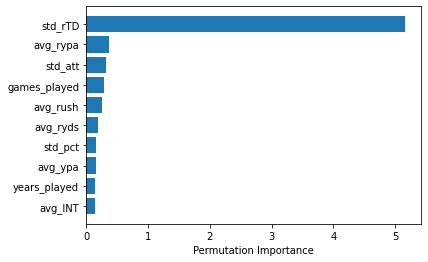

In [3]:
rfPPR_results = revised_run(X_train2022, X_test2022, 'qb', model_ = 'rf', pca=False)
rfPPR_results.head(50)

In [4]:
svrPPR_results = revised_run(X_train2022, X_test2022, 'qb', model_ = 'svr')
svrPPR_results.head(50)

======= Fold 0 ========
Our accuracy on the validation set is 4.514801770054255
======= Fold 1 ========
Our accuracy on the validation set is 4.671482061205088
======= Fold 2 ========
Our accuracy on the validation set is 4.197351910802719
======= Fold 3 ========
Our accuracy on the validation set is 5.240635579041256
======= Fold 4 ========
Our accuracy on the validation set is 7.033407035773752
Overall accuracy: 5.131535671375414
iteration 1: Dimensions = (38, 2)
iteration 2: Dimensions = (76, 2)
iteration 3: Dimensions = (114, 2)
iteration 4: Dimensions = (152, 2)
iteration 5: Dimensions = (190, 2)


,name,proj fpts,class,rank,last rank
0,jalen-hurts,22.745093,1,1,3
1,josh-allen-qb,20.936622,1,2,2
2,patrick-mahomes,20.853152,0,3,1
3,joe-burrow,20.831709,0,4,4
4,daniel-jones,20.641937,1,5,9
5,trevor-lawrence,20.621168,0,6,8
6,justin-fields,19.896056,1,7,6
7,lamar-jackson,18.764791,1,8,13
8,kyler-murray,18.316265,1,9,18
9,dak-prescott,17.968901,0,10,17


In [5]:
mean_results_PPR = xgbPPR_results.append([rfPPR_results, svrPPR_results], ignore_index = True)[['name', 'proj fpts']].groupby('name', as_index=False).mean().sort_values('proj fpts', ascending=False)
mean_results_PPR = mean_results_PPR.reset_index(drop=True)
mean_results_PPR['rank'] = mean_results_PPR.index + 1
mean_results_PPR.to_csv('projections/qb_PPR_2022_mean_projections.csv', index = False)
mean_results_PPR.head(50)

,name,proj fpts,rank
0,jalen-hurts,23.926939,1
1,josh-allen-qb,21.788760,2
2,joe-burrow,21.318459,3
3,patrick-mahomes,21.231188,4
4,justin-fields,21.131801,5
5,trevor-lawrence,20.566251,6
6,daniel-jones,20.074496,7
7,lamar-jackson,19.652785,8
8,tua-tagovailoa,18.370591,9
9,justin-herbert,18.361574,10
